In [7]:
import numpy as np
import pandas as pd
import mglearn
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

cancer = load_breast_cancer()

In [8]:
X = cancer.data[:,:2]
y = cancer.target

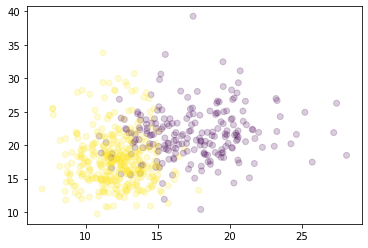

In [9]:
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.2)

In [10]:
model = SVC(probability=True)
model.fit(X, y)
model.score(X, y)

0.9121265377855887

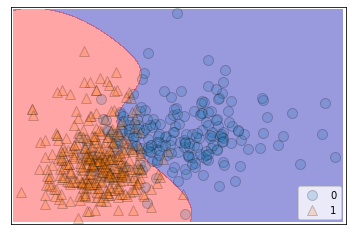

In [11]:
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y, alpha=0.2)
plt.legend(loc = 4)

Text(0.5, 1.0, 'SVM - decision bounds')

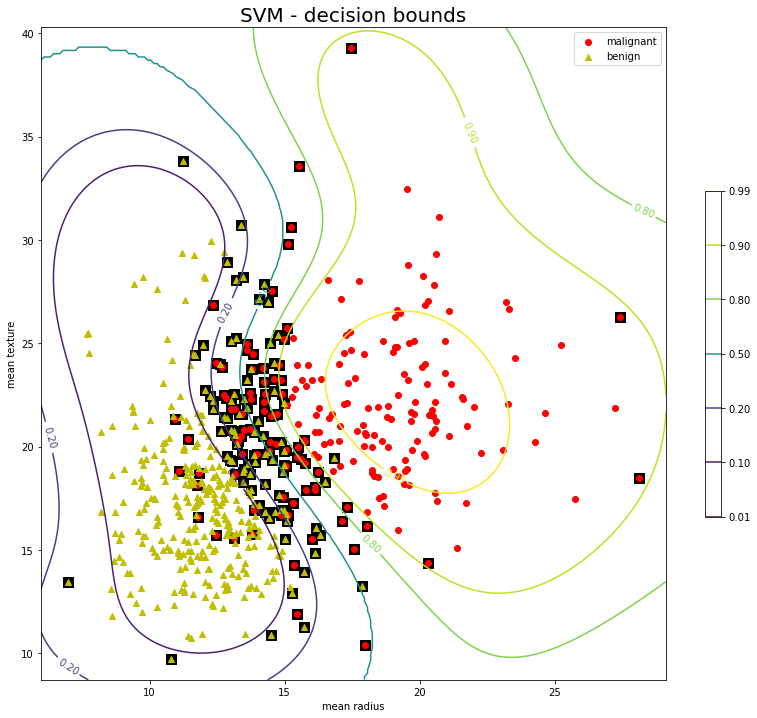

In [12]:
xmax = X[:,0].max()+1
xmin = X[:,0].min()-1
ymax = X[:,1].max()+1
ymin = X[:,1].min()-1

xx=np.linspace(xmin,xmax,200)
yy=np.linspace(ymin,ymax,200)
data1, data2 = np.meshgrid(xx,yy)
X_grid = np.c_[data1.ravel(), data2.ravel()]
decision_values = model.predict_proba(X_grid)[:,0] # 등고선을 위해 확률점수를 구함

sv=model.support_vectors_

fig=plt.figure(figsize=[14,12])

# show probability countour
CS=plt.contour(data1,data2,decision_values.reshape(data1.shape),levels=[0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 0.99])
plt.clabel(CS, inline=2, fontsize=10)

# show support vectors
plt.scatter(sv[:,0], sv[:,1], marker='s', c= 'k', s=100)

# show train samples
plt.scatter(X[:,0][y==0],X[:,1][y==0],marker='o',c='r',label='malignant')
plt.scatter(X[:,0][y==1],X[:,1][y==1],marker='^',c='y',label='benign')

plt.legend()
plt.colorbar(CS,shrink=0.5)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.title('SVM - decision bounds',fontsize=20)

In [13]:
model = SVC(C=10, gamma = 10)
model.fit(X, y)
model.score(X, y)

0.9947275922671354

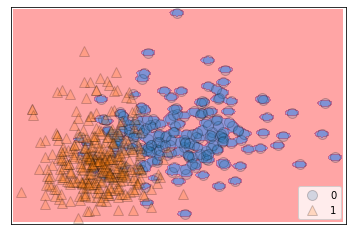

In [14]:
mglearn.plots.plot_2d_separator(model, X, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X[:,0], X[:,1], y, alpha=0.2)
plt.legend(loc = 4)

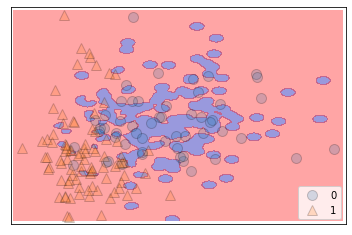

In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data[:,:2], cancer.target)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = SVC(C=10, gamma = 10)
model.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(model, X_test, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, alpha=0.2)
plt.legend(loc = 4)

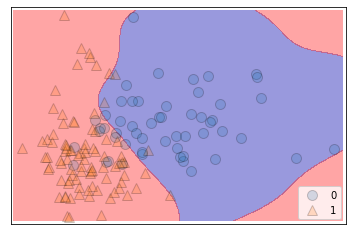

In [21]:
model = SVC(C=0.1, gamma = 0.1)
model.fit(X_train, y_train)

mglearn.plots.plot_2d_separator(model, X_test, fill=True, eps=0.5, alpha=0.4)
mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test, alpha=0.2)
plt.legend(loc = 4)

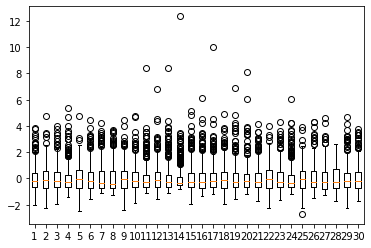

In [25]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

m = X_train.mean(axis=0)
s = X_train.std(axis = 0)

X_train_norm = (X_train - m)/s
X_test_norm = (X_test - m)/s


plt.boxplot(X_train_norm); pass

In [28]:
model = SVC()
model.fit(X_train_norm, y_train)
train_score = model.score(X_train_norm, y_train)
test_score = model.score(X_test_norm, y_test)
print(train_score, test_score)

0.9882629107981221 0.972027972027972


In [32]:
model = SVC()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(train_score, test_score)

0.9131455399061033 0.9370629370629371


1.0 0.7972027972027972


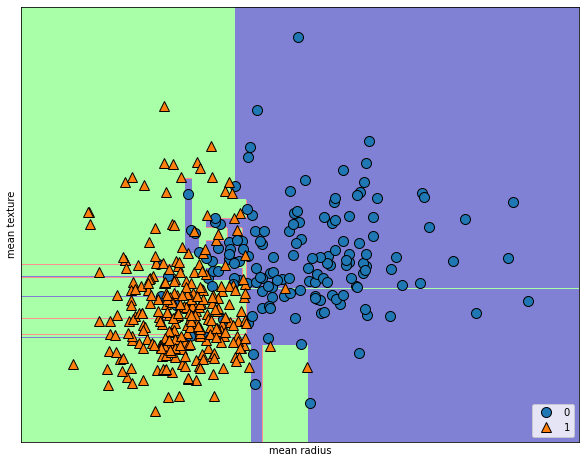

In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

X_train = X_train[:, :2]
X_test = X_test[:, :2]

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

import mglearn

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)


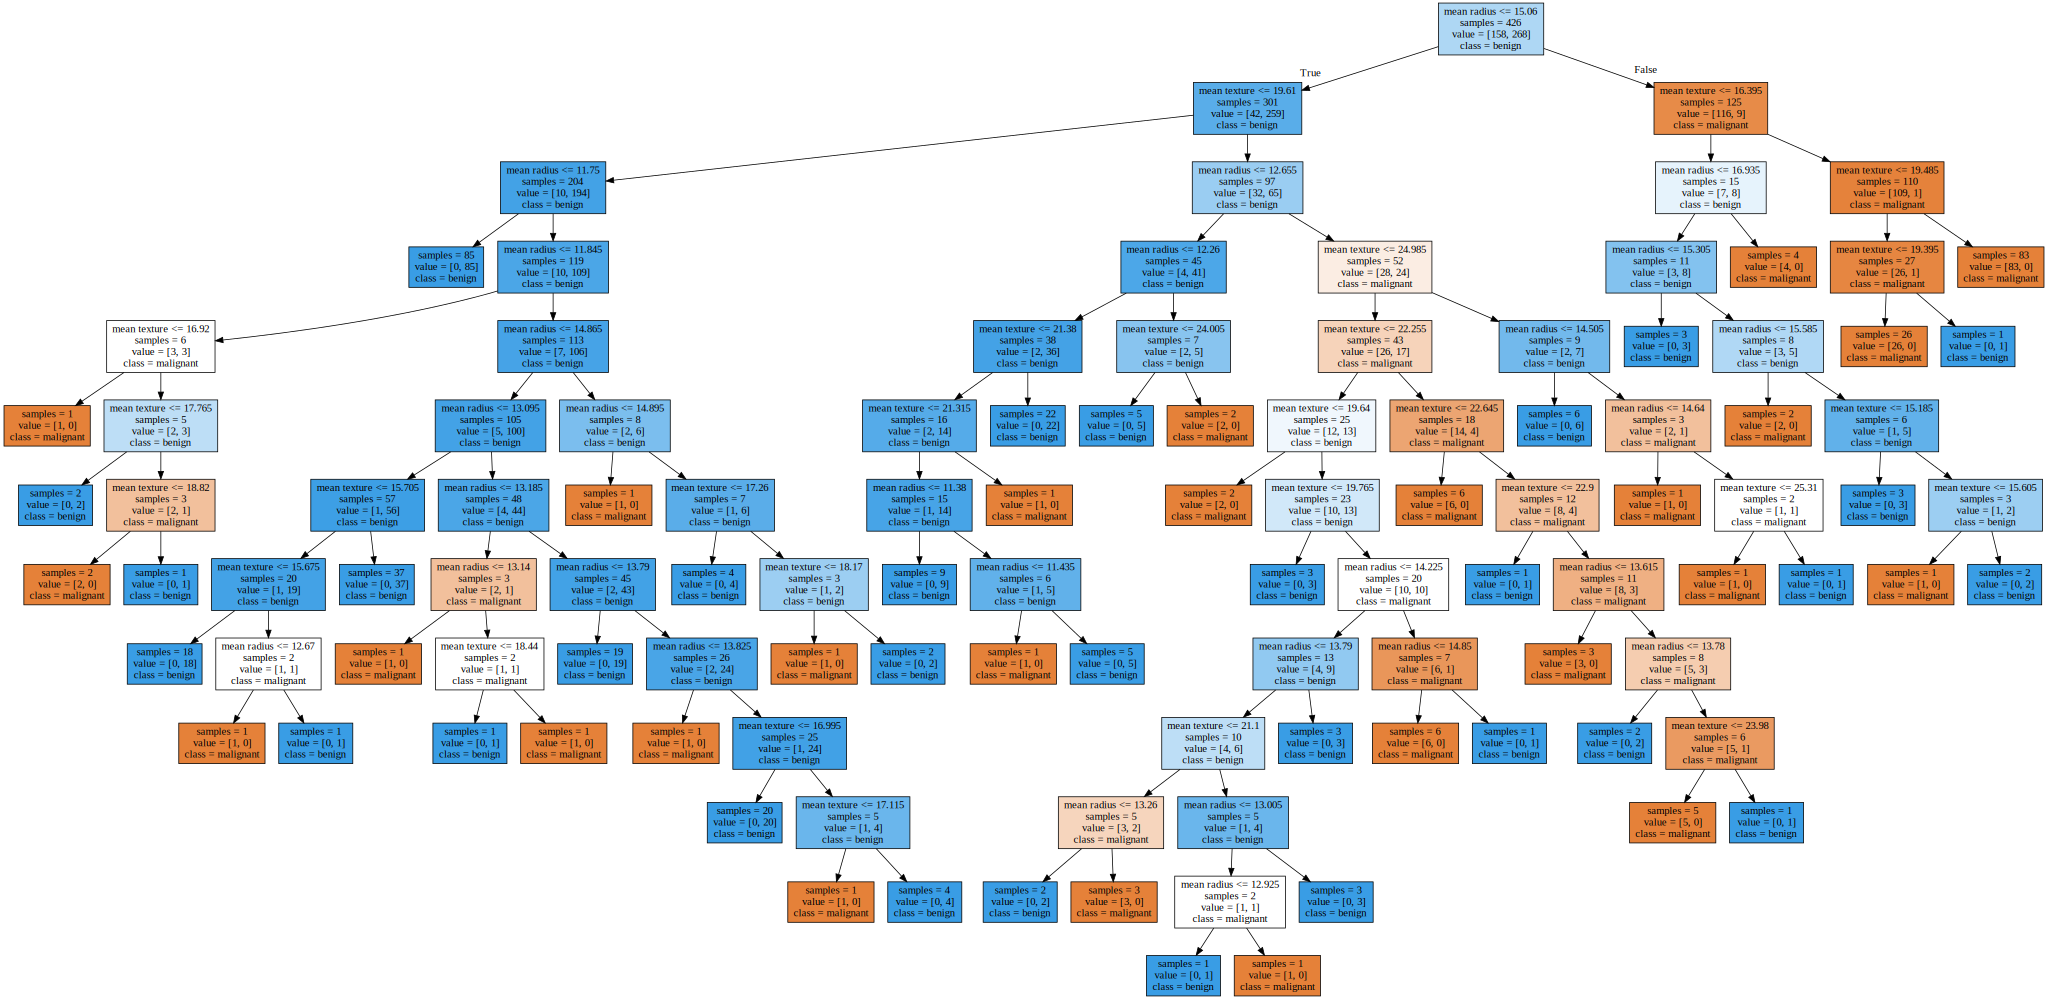

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='tree.dot', class_names=cancer.target_names,
                feature_names=cancer.feature_names[:2], impurity=False, filled=True)
                
import graphviz

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

0.9061032863849765 0.8811188811188811


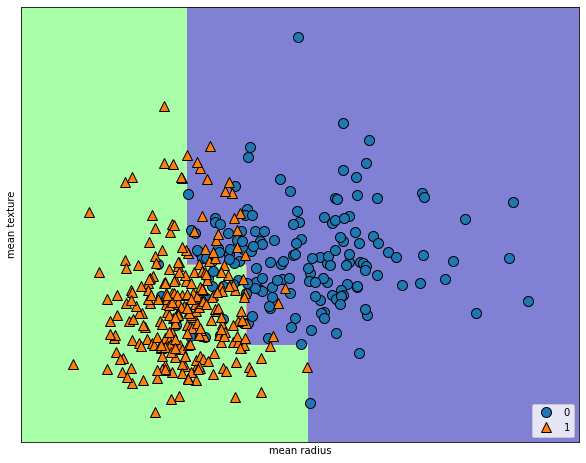

In [12]:

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

X_train = X_train[:, :2]
X_test = X_test[:, :2]

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score  = model.score(X_test, y_test)
print(train_score, test_score)

plt.figure(figsize=[10,8])
mglearn.plots.plot_2d_classification(model, X_train, alpha=0.5)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel(cancer.feature_names[0])
plt.ylabel(cancer.feature_names[1])
plt.legend(loc=4)
